Ссылка на colab
https://colab.research.google.com/drive/1Vijs1b0Pw8JJKSaAv9e0zQkhk4BR3Lc8?usp=sharing


In [1]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [2]:
arr = np.arange(1,101).reshape((10,10))   # Инициализация массива и сразу же его преобразование
arr[::2,::2]    # Срез по условию

array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [3]:
# решение с использованием numpy
# для оценки времени исоплнения блока
%%time
# зададим длину нашей последовательности
dlina_posl = 100_000_000

def mean_numpy(length):
  return np.arange(length).mean()

print(f'Среднее арифметическое последовательности {mean_numpy(dlina_posl)}')


Среднее арифметическое последовательности 49999999.5
CPU times: user 328 ms, sys: 443 ms, total: 771 ms
Wall time: 774 ms


In [4]:
# решение без использования numpy
# для оценки времени исоплнения блока
%%time

def mean_not_numpy(length):
  return sum(range(length))/length

print(f'Среднее арифметическое последовательности {mean_not_numpy(dlina_posl)}')

Среднее арифметическое последовательности 49999999.5
CPU times: user 1.83 s, sys: 4.55 ms, total: 1.84 s
Wall time: 1.84 s


## Задание 3 *(необязательно)

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [5]:
# задано изначально
r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))

s.sort_values(inplace = True)
s[s>5].index[0]

67

## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

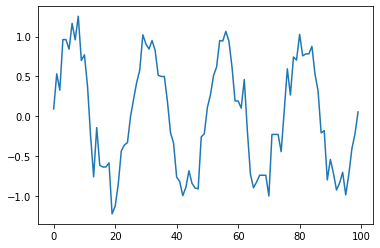

In [6]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

# ваш код тут
df.fillna(method = 'backfill', inplace = True)

# отобразим
plt.plot(df.target.values)

## Задание 5 *(необязательно)

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [7]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

# ваш код тут

print('Вывести всех, кто старше 40\n')
print(df[df['возраст'] > 40])

print('\nВывести всех, кто имеет доход выше среднего по датасету\n')
print(df[df['доход'] > df['доход'].mean()])

print('\nвсех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету\n')
print(df[(df['доход'] > df['доход'].mean()) & (df['надежность клиента (0..1)'] < df['надежность клиента (0..1)'].mean())])

# Создание столбцов
df['важность клиента'] = df['доход'] * df['надежность клиента (0..1)']
df['возможная долгосрочность клиента'] = df['важность клиента'] * (df['возраст'].mean() - df['возраст'])
df

Вывести всех, кто старше 40

    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен

Вывести всех, кто имеет доход выше среднего по датасету

    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен

всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж


,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


### ДОП Задание к ДЗ (Необязательно к выполнению, но приносит доп. балл)
Дополните класс `Phystech` так, чтобы у пользователей появился список друзей. Пользователи должны быть в состоянии добавлять других в друзья по `uid`, удалять других из друзей; смотреть на список общих друзей; проверять, приняли ли заявку в друзья; видеть актуальный список входящих и исходящих заявок; запрещать конкретным пользователям добавлять себя в друзья. 

При этом любое действие пользователя должно обновлять переменную `self.last_online`, а история её значений для каждого из пользователей должна накапливаться в статическом поле класса (т.е. должен быть `Dict[int, List[datetime]]` -- отображение из  `uid` в историю сеансов. 


Задание с двумя звёздочками -- сгенерировать 20 случайных пользователей, случайным образом просимулировать их взаимодействия, затем собрать `pandas.DataFrame` с данными о том, когда пользователи были онлайн и сколько у разных пользователей общих друзей, а потом визуализировать эти данные в `seaborn` с помощью `line plots` и `heatmap` соответственно.   


In [8]:
# Импорт модулей
from typing import Optional, List, Dict
from datetime import datetime

In [9]:
class Phystech:
    '''
      Документация (написал только к тому, чем я дополнил класс)

      friend_list - словарь
        Структура:
          {uid : status}
          uid - ID пользователя
          status - в каком статусе находится пользователь

        Суть:
          Создается для каждого пользователя. 
          Можно назвать небольшой "базой данных". В словарь заносятся все пользователи и их статус,
          с которыми происходило взаимодействие
          Запись о пользователе удаляется, если происходит удаление из друзей

        Статусы:
          Статус относится к соответствующему uid

          friend - пользователь в друзьях
          blocked - пользователь заблокирован
          in - входящая заявка от этого пользователя
          out - исходящая заявка этому пользователю


      _last_online_update(self)
        Метод обновляет последний онлайн пользователя, обновляет словарь onlines_history
        
        Вызывается при любом действии пользователя
        Аргументов не принимает. Ничего не возвращает.

      invite_to_friend(self, uid)
        Метод отсылает заяввку пользователю на добавление в список друзей
        Если уже имеется встречная заявка от этого пользователя - юзеры добавляются в друзья друг к другу,
        если нет - отправляется запрос.
        Если пользователь заблокировал иницатора заявки - возвращается ошибка

        Аргументы: 
          uid - ID пользователя, корому отправляем заявку в друзья

        Метод возвращает кортеж вида: (True/False (bool), текст ошибки(str))


      delete_friend(self, uid)
        Метод удаляет пользователя из списка друзей

        Аргументы:
          uid - ID, пользователя, которого нужно удалить из друзей

        Возвращает True при успешном удалении
        Возвращает False, если пользователь не в друзьях или пользователя не существует


      get_mutual_friends(self, uid)
        Метод показывает общих друзей

        Аргументы:
          uid - ID пользователя, с которорым не обходимо посмотреть список друзей

        Возвращает set с общим списком друзей. Если общих друзей нет, вернет пустой список
        Возвращает False и тест ошибки, если произошла ошибка


      get_invite_status(self, uid)
        Метод проверяет статус запроса в друзья

        Аргументы: 
          uid - ID пользователя, для которого смотрим статус заявки

        Возвращает True и текст, если заявка принята
        Возвращяет False и текст ошибки, если заявку не приняли или произошла ошибка


      block_user(self, uid)
        Метод блокирует пользователя

        Аргументы:
          uid - ID юзера, которого надо заблокировать

        Возвращает True и текст, если блокировка успешна
        Возвращает False и текст ошибки, если произошла ошибка


      invite_list_in(self)
        Метод показывает список входящих заявок

        Возвращает list с входящими заявками. Если их нет, возвратит пустой список


      invite_list_out(self)
        Метод показывает список исходящих заявок

        Возвращает list с исходящими заявками. Если их нет, возвратит пустой список

    '''

    # uids_dict Используется для хранения экземпляров класса. Не придумал как сделать по другому, что бы обращаться к классу по uid.
    # Если есть какой-то другой способ, хотел бы о нем узнать :)
    uids_dict = {}
    uid = 0
    onlines_history = {None: [None]}

    def __init__(
        self, 
        name: str,  
        login: str,
        password: str,
        graduation_year: Optional[int] = None,
        birthday: Optional[datetime] = None, 
        status: Optional[str] = None,
    ):
        self.name = name
        self.status = status
        self.__uid = Phystech.uid
        Phystech.uid += 1

        self._birthday = birthday
        self._graduation_year = graduation_year
        self.__login = login
        self.__password = password
        self.last_online = 0

        self._last_online_update()

        # список друзей
        self.friend_list = {}

        Phystech.uids_dict[self.__uid] = self

    @property
    def is_graduate(self) -> Optional[bool]:
        if self._graduation_year is not None:
            return datetime.now().year - self._graduation_year > 0
        return None

    def __str__(self) -> str:
        str_repr_lines = [
            f'НаФизтехе. Пользователь \"{self.name}\".',
            'День рождения: {}'.format(
                self._birthday if self._birthday is not None else '(скрыт)'
            ),
            f'Статус: \"{self.status}\".',
            f'Последний раз был онлайн {self.last_online}'
        ]
        if self.is_graduate is not None:
            if self.is_graduate:
                str_repr_lines.append(
                    f'Выпускник {self._graduation_year} года'
                )
        return '\n'.join(str_repr_lines)

    def __repr__(self) -> str:
        return '\n'.join([
            f'uid:\t{self.__uid}',
            f'last_online:\t{self.last_online}',
        ])

    def _last_online_update(self):
        self.last_online = datetime.now()

        if self.__uid not in Phystech.onlines_history.keys(): 
          Phystech.onlines_history[self.__uid] = [self.last_online]
        else:
          Phystech.onlines_history[self.__uid].append(self.last_online)

    def invite_to_friend(self, uid):
      self._last_online_update()

      if self.__uid == uid:
        return (False, 'Нельзя добавить самого себя :(')

      if uid not in Phystech.uids_dict.keys():
        return (False, f'Пользователя с UID {uid} не существует')

      if self.__uid in Phystech.uids_dict[uid].friend_list.keys() and Phystech.uids_dict[uid].friend_list[self.__uid] == 'blocked':
        return (False, 'Пользователь запретил вам добавляться в друзья')

      if uid in self.friend_list.keys() and self.friend_list[uid] == 'friend':
        return (False, 'Пользователь уже у вас в друзьях')

      if self.__uid in Phystech.uids_dict[uid].friend_list.keys() and Phystech.uids_dict[uid].friend_list[self.__uid] == 'out':
        Phystech.uids_dict[uid].friend_list[self.__uid] = 'friend'
        self.friend_list[uid] = 'friend'
        return (True, f'Пользователь с UID {uid} добавлен в друзья')
      
      # Текущему юзеру добавляем исходящую заявку к UID
      self.friend_list[uid] = 'out'
      # Добавляем юзеру с UID входящую заявку в друзья
      Phystech.uids_dict[uid].friend_list[self.__uid] = 'in'
      return (True, f'Пользователю с UID {uid} отправлена заявка в друзья')

    def delete_friend(self, uid):
      self._last_online_update()

      if self.__uid == uid:
        return (False, 'Нельзя удалить самого себя :(')

      if uid not in Phystech.uids_dict.keys():
        return (False, f'Пользователя с UID {uid} не существует')

      if uid in self.friend_list.keys() and self.friend_list[uid] == 'friend':
        del Phystech.uids_dict[uid].friend_list[self.__uid]
        del friend_list[uid]
        return (True, 'Пользователь удален из друзей')

      else:
        return (False, 'Ошибка')

    def get_mutual_friends(self, uid):
      self._last_online_update()

      if self.__uid == uid:
        return (False, 'Ошибка')

      if uid not in Phystech.uids_dict.keys():
        return (False, f'Пользователя с UID {uid} не существует')
      
      uid1 = set(self.friend_list.keys())
      uid2 = set(Phystech.uids_dict[uid].friend_list.keys())

      return uid1.intersection(uid2)

    def get_invite_status(self, uid):
      self._last_online_update()

      if self.__uid == uid:
        return (False, 'Ошибка')
      
      if uid not in Phystech.uids_dict.keys():
        return (False, f'Пользователя с UID {uid} не существует')

      if uid in self.friend_list.keys() and self.friend_list[uid] == 'friend':
        return (True, 'Пользователь принял вашу заявку')

      elif uid in self.friend_list.keys() and self.friend_list[uid] == 'out':
        return (False, 'Заявка еще не принята')

      else:
        return (False, 'Ошибка')

    def block_user(self, uid):
      self._last_online_update()

      if self.__uid == uid:
        return (False, 'Нельзя блокировать самого себя :(')

      if uid not in Phystech.uids_dict.keys():
        return (False, f'Пользователя с UID {uid} не существует')
      
      self.friend_list[uid] = 'blocked'
      if self.__uid in Phystech.uids_dict[uid].friend_list.keys():
        del Phystech.uids_dict[uid].friend_list[self.__uid]
      
      return (True, 'Пользователь заблокирован')

    def invite_list_in(self):
      self._last_online_update()

      result_list = []
      for key, value in self.friend_list.items():
        if value == 'in':
          result_list.append(key)

      return result_list

    def invite_list_out(self):
      self._last_online_update()

      result_list = []
      for key, value in self.friend_list.items():
        if value == 'out':
          result_list.append(key)

      return result_list

    def getuid(self):
      return self.__uid
    

In [10]:
from random import randint
import pandas as pd

In [11]:
Users = []
Names = ['Петя', 'Федя', 'Игнат', 'Марат', 'Арарат', 'Кузя', 'Михаил', 'Владимир', 'Алекс', 'Иван', 'Денис', 'Игорь', 'Юлий', 'Юрий', 'Роберт']
Surname = ['Кузнецов', 'Овечкин', 'Петрович', 'Монетный', 'Богатый', 'Аверкиев', 'Руссов', 'Шпионов', 'Белый', 'Черный', 'Кузьмин']

users_amount = 20
for i in range(users_amount):
  Users.append(Phystech(
      name = f"{Names[randint(0, len(Names)-1)]} {Surname[randint(0, len(Surname)-1)]}",
      birthday = datetime(year=randint(1990,2020),month=randint(1,12), day=randint(1,28)),
      status = 'Привет, новая соцсеть!',
      login = 'user ' + str(i),
      graduation_year=randint(1995,2025),
      password = 'супернадежныйпароль'
                      )
               )

In [12]:
print(Users[6])

НаФизтехе. Пользователь "Денис Богатый".
День рождения: 2005-07-15 00:00:00
Статус: "Привет, новая соцсеть!".
Последний раз был онлайн 2020-12-03 12:07:57.629531
Выпускник 2007 года


In [24]:
for user in range(users_amount):
  rnd = randint(0,7)
  if rnd == 0:
    Users[user].delete_friend(randint(0,users_amount-1))
  elif rnd == 4:
    Users[user].block_user(randint(0,users_amount-1))
  else:
    Users[user].invite_to_friend(randint(0,users_amount-1))


In [25]:
df = pd.DataFrame()
df['UID'] = [i for i in range(users_amount)]
df['last online'] = [Users[i].last_online for i in range(users_amount)]
for i in range(users_amount):
  df['friend_'+str(i)] = [(len(Users[i].get_mutual_friends(k)) if isinstance(Users[i].get_mutual_friends(k),set) else 0) for k in range(users_amount)]
#df = df.set_index('UID')
df

,UID,last online,friend_0,friend_1,friend_2,friend_3,friend_4,friend_5,friend_6,friend_7,friend_8,friend_9,friend_10,friend_11,friend_12,friend_13,friend_14,friend_15,friend_16,friend_17,friend_18,friend_19
0,0,2020-12-03 12:08:25.096493,0,0,1,0,1,0,3,2,1,2,1,1,1,1,1,1,1,1,2,1
1,1,2020-12-03 12:08:25.096514,0,0,2,1,1,1,0,3,1,3,3,2,2,2,3,2,1,3,1,6
2,2,2020-12-03 12:08:25.096529,1,2,0,1,2,1,2,2,0,2,4,1,2,1,2,1,2,3,2,3
3,3,2020-12-03 12:08:25.096540,0,1,1,0,1,2,0,1,1,1,0,1,1,2,2,2,1,0,0,3
4,4,2020-12-03 12:08:25.096547,1,1,2,1,0,0,1,1,0,2,1,1,0,1,1,2,1,2,0,3
5,5,2020-12-03 12:08:25.096556,0,1,1,2,0,0,1,1,2,2,0,1,0,1,0,2,1,2,1,3
6,6,2020-12-03 12:08:25.096565,3,0,2,0,1,1,0,1,0,1,1,1,1,0,1,2,3,2,4,2
7,7,2020-12-03 12:08:25.096574,2,3,2,1,1,1,1,0,1,3,1,1,1,3,4,2,0,1,2,3
8,8,2020-12-03 12:08:25.096584,1,1,0,1,0,2,0,1,0,1,0,0,0,2,1,2,0,1,0,2
9,9,2020-12-03 12:08:25.096594,2,3,2,1,2,2,1,3,1,0,3,2,1,0,1,2,1,5,1,2


In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

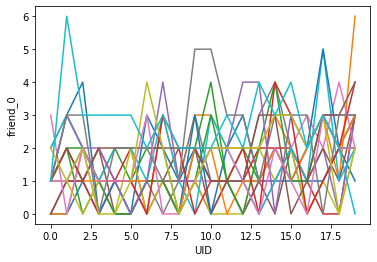

In [26]:
for i in range(users_amount):
  sns.lineplot(data = df, y = 'friend_'+str(i), x = 'UID')
#sns.lineplot(data = df.drop(['last online'], axis=1).set_index('UID'))
plt.show()

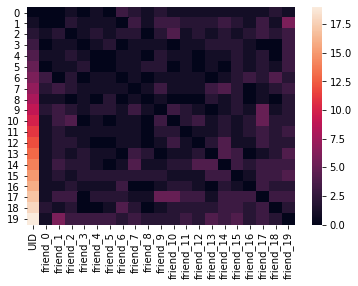

In [27]:
sns.heatmap(df.drop(['last online'], axis=1))
plt.show()